# Métodos Numéricos 2024 

## Guía 2: 2024-04-04 - Solución de ecuaciones de una variable

In [2]:
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

### Problema 1

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de la bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ al error relativo $(p-x)/x$ de la aproximación $p$ de la raíz $x$ de $f$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

El programa debe retornar una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas $\varepsilon_x$ y $\varepsilon_f$,

* un vector de componentes $p_i$ que representan las aproximaciones a la raíz $x$ obtenidas por el algoritmo en sucesivas iteraciones $i=1,2,...,n$,

* un vector de componentes $f_i=f(p_i)$,

* un vector de componentes $c_i=|b_i-a_i|/2$ que representan cotas de los errores absolutos $|x-p_i|$,

* y un vector de componentes $r_i=c_i/|p_i|$ que representan estimaciones de los errores relativos $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; i=n_{\max}
$$

El programa debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

Con el programa desarrollado, Ud. debe:

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello: 

    * Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.
    * Grafique $f(x)$ vs $x$ en el intervalo $[1,2]$ para determinar que tiene una raíz allí.
    * Utilice el programa desarrollado para calcular los vectores de aproximaciones y errores.
    * Imprima una lista con los valores $i$, $p_i$, $f_i$, $c_i$ y $r_i$ para $i=1,...,n$, utilizando el paquete `DataFrames`.
    * Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    * Grafique $|f_i|$ vs $i$ usando puntos, escala logarítmica en el eje $y$ y lineal en el eje $x$.
    * En una misma figura, grafique con puntos de un color los errores absolutos $c_i$ vs $i$ y con puntos de otro color los errores relativos $r_i$ vs $i$, utilizando escala logarítimica en el eje $y$ y lineal en el eje $x$. 
    * Responda: 
        * Cuanto vale la presunta mejor aproximación $p_n$? 
        * Cuántas iteraciones fueron necesarias?
        * Cuales son los valores exactos de los errores absoluto y relativo que se obtienen de comparando el resultado $p_n$ con el "analítico"?   
    
2. Encontrar la menor solución positiva de la ecuación $g(x)=\tan(x)-2x$ con un error relativo en $x$ y absoluto en $y$ menor a $10^{-5}$. Para ello, repita lo realizado en el inciso anterior considerando el intérvalo $x\in [0.8,1.4]$, pero exceptuando el último item ya que no podemos calcular el valor analítico en este caso. 

**IMPORTANTE:** Recuerde poner títulos, etiquetas a los ejes y leyendas para las curvas o puntos de los gráficos.

In [50]:
  
function biseccion(f,a,b,ϵx,ϵf,maxi)

    ci=0
    ri=ϵx+1
    xp=a + (b-a)/2
    i=1
    estimaciones = Array{Any}(undef, maxi,5)
    intervalos = Array{Float64}(undef,maxi,4)
    
     for i in 1:maxi
            
        if f(xp)*f(a)<0
            b=xp
        else
            a=xp
        end
        
        intervalos[1]=a
        intervalos[2]=b
        intervalos[3]=f(a)
        intervalos[4]=f(b) 
        
        xp = a + (b-a)/2
        ci=abs(b-a)/2
        ri=ci/abs(xp)
        estimaciones[i,:] = [false xp f(xp) ci ri] 
        
         if abs(f(xp))<ϵf && ri<ϵx
            println("El algoritmo convergió")
            limpio = Array{Any}(undef, i,5)
            for j in 1:i-1
                limpio[j,:] = estimaciones[j,:]
            end
            limpio[i,:] = [true xp f(xp) ci ri] 
            return(xp, limpio,intervalos)
            
            break
        end
        
        if i == maxi
           println("El algoritmo no convergió")
           limpio = Array{Any}(undef, i,5)
            for j in 1:i
                limpio[j,:] = estimaciones[j,:]
            end
            return(xp, limpio,intervalos)
        end
        
    end        
end




biseccion (generic function with 1 method)

### Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de Newton** (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los **incisos 1 y 2** del **problema 1**, usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

In [38]:
using Plots,DataFrames

function raiz_tangente(a,f::Function,df::Function)
    return( (-f(a)/df(x)) + a )
end

function newton(f::Function,df::Function,Xp,ϵx::Float64,ϵf::Float64,maxit::Int)

    ci = 0
    ri=ϵx+1
    estimaciones = Array{Any}(undef, maxit,5)
    
    for i in 1:maxit
        
       # println((abs(f(Xp))<ϵf && ri<ϵx))
       # println(abs(abs(f(Xp))-ϵf),"       ",abs(abs(Xp)-ϵx))
        
        if (abs(f(Xp))<ϵf && ri<ϵx);
            println("El algoritmo convergió")
            estimaciones[i-1,1] = true#[true Xp f(Xp) ci ri]
            limpio = Array{Any}(undef,i-1,5)
            for j in 1:i-1
                limpio[j,:] = estimaciones[j,:] 
            end
            return(Xp,limpio)
        end
      
        
        Xp1 = Xp
        Xp = (-f(Xp)/df(Xp))+Xp
        ci = abs(Xp-Xp1)
        ri = abs(ci/Xp)
        
        estimaciones[i,:] = [false Xp f(Xp) ci ri]

        if i==maxit
            println("El algoritmo no convirgió")
           limpio = Array{Any}(undef,i,5)
             for j in 1:i
                limpio[j,:] = estimaciones[j,:]  
            end
             return(Xp,limpio)
        end
    end
  
    return(Xp,limpio)
end



newton (generic function with 1 method)

### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la **bisección** y **Newton**, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

In [5]:
f(x) = (x^2) - 3
new = newton(f,2.5,0.00000000001,0.00000000001,1000)
biy = biseccion(f,0,2.5,0.00000000001,0.00000000001,1000)
#plot(new[2][:,2],new[2][:,5],scale=:log10)
#plot!(biy[2][:,2],biy[2][:,5],scale=:log10)
for i in 1:size(biy,1)
    println(i," | ",biy[2][i,5])
end
println(biy[1])

LoadError: MethodError: no method matching newton(::typeof(f), ::Float64, ::Float64, ::Float64, ::Int64)

[0mClosest candidates are:
[0m  newton(::Function, [91m::Function[39m, ::Any, ::Float64, [91m::Float64[39m, [91m::Int64[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[4]:7[24m[39m


### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.

Grafique $h(t)$ para analizar su comportamiento.

Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de **bisección** y el de **Newton**.

El algoritmo convergió
El algoritmo convergió
Newton: t = 2.1649461480593875s
Bisección:  t = 2.16552734375s


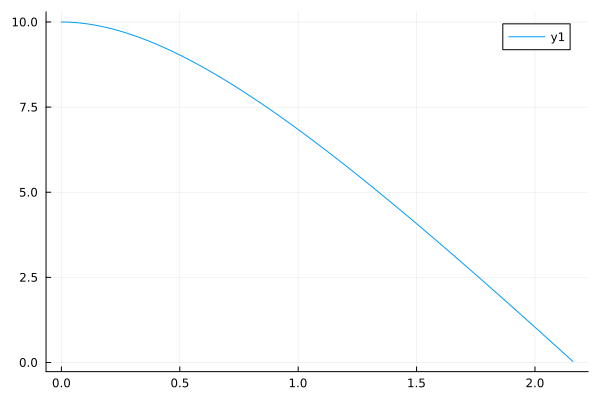

In [44]:
h₀=10
g1=9.8
k=0.149
m=0.1
h(x) = h₀ - ((m*g1*x)/k) + (m^2)*g1*(1-exp(-k*x/m))/k^2
dh(x) = (-m*g1/k)-(k/m) * exp(-k*x/m)

n= newton(h,dh,5,0.01,0.01,100)
b= biseccion(h,0,5,0.01,0.01,100)

println("Newton: t = ",n[1],"s")
println("Bisección:  t = ",b[1],"s")

x=range(0,stop=n[1],step=0.01)
plot(x,h)

### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$. Utilice las escalas log-lineal (es decir, logarítmica en el eje $y$ y lineal en el $x$).

El algoritmo convergió
El algoritmo convergió
El algoritmo convergió
El algoritmo convergió


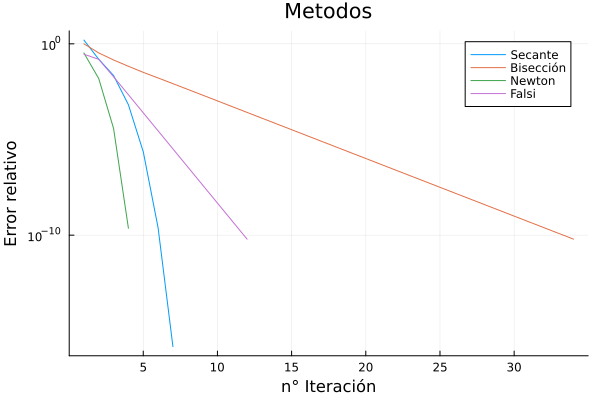

In [54]:
f(x) = x-cos(x)
df(x)=1+sin(x)
ϵx=10^(-10)

s = secante(f,0,pi/2,ϵx,ϵx,100)[2]
b = biseccion(f,0,pi/2,ϵx,ϵx,100)[2]
n = newton(f,df,1,10^(-8),10^(-8),100)[2]
fal = falsi(f,0,pi/2,ϵx,ϵx,100)[2]

x= range(1,stop=size(s,1),step=1)
plot(x,s[x,5],yscale=:log10,xscale=:identity,label="Secante",title="Metodos",ylabel="Error relativo",xlabel="n° Iteración")

x= range(1,stop=size(b,1),step=1)
plot!(x,b[x,5],yscale=:log10,xscale=:identity,label="Bisección")

x= range(1,stop=size(n,1),step=1)
plot!(x,n[x,5],yscale=:log10,xscale=:identity,label="Newton")

x= range(1,stop=size(fal,1),step=1)
plot!(x,fal[x,5],yscale=:log10,xscale=:identity,label="Falsi")


In [53]:
using Plots

function secante(f,a,b,ϵx,ϵf,maxi)
    ri=ϵx + 1
    ci=0
    estimaciones=Array{Any}(undef,maxi,5)
    X = b - ((b-a)*f(b))/(f(b)-f(a))

    for i in 1:maxi
        
        X = b - ((b-a)*f(b))/(f(b)-f(a))
                
        a=b  
        b=X  
        ci=abs(b-a)
        ri=ci/abs(b)
        
        
        

        if (abs(f(X))<ϵf && ri<ϵx)
            println("El algoritmo convergió")
            estimaciones[i,:]=[true X f(X) ci ri]
            limpio=Array{Any}(undef,i,5)
            
            for j in 1:i
                limpio[j,:]=estimaciones[j,:]
            end
            
            return(X,limpio)
            
            break
        end
        
        estimaciones[i,:]=[false X f(X) ci ri]
        if i == maxi
            println("El algoritmo no convergió")
            return(X,estimaciones)
        end
        
    end
end


secante (generic function with 1 method)

In [9]:
  
function falsi(f,a,b,ϵx,ϵf,maxi)

    ci=0
    ri=ϵx+1
    xp=
    xp1=a + (b-a)/2

    i=1
    estimaciones = Array{Any}(undef, maxi,5)
    intervalos = Array{Float64}(undef, maxi,4)
    
     for i in 1:maxi
        
        
        #Calculo la raìz de la recta secante que pasa por (a,f(a)) y (b,f(b))
        xp=(a*f(b)-b*f(a))/(f(b)-f(a))
        #Me fijo si cambia el signo en f comparado con f(a) y f(b)
        if f(xp)*f(a)<0
            b=xp
           #Queda el intervalo [a,xp]
        else
            a=xp
            #Queda el intervalo [xp,b]
        end
        #Almaceno los datos para la gràfica de de las rectas secantes
        intervalos[i,:]=[a f(a) b f(b)]
        #Cálculo de el error absoluto como la longitud del intervalo 
        ci=abs(xp1-xp)
        #Cálculo del error relativo, como el absoluto sobre la estimación actual de la raíz
        ri=abs(ci/abs(xp))
        #Almaceno los datos para el output
        estimaciones[i,:] = [false xp f(xp) ci ri] 
        #Verificar si no se alcanzó el maximo de interaciones
        xp1=xp
        
        if abs(f(xp))<ϵf && (ri)<ϵx
            println("El algoritmo convergió")
            limpio = Array{Any}(undef, i,5)
            for j in 1:i-1
                limpio[j,:] = estimaciones[j,:]
            end
            limpio[i,:] = [true xp f(xp) ci ri] 
            return(xp, limpio,intervalos)
            
            break
        end

        if i == maxi
           println("El algoritmo no convergió")
           limpio = Array{Any}(undef, i,5)
            for j in 1:i
                limpio[j,:] = estimaciones[j,:]
            end
            return(xp, limpio,intervalos)
        end
        
    end        
end
#f(x) = x-cos(x)
#fal=falsi(f,0,pi/4,10^(-10),10^(-10),100)[2]

    

falsi (generic function with 1 method)

In [49]:
#=g(x) = x-cos(x)

function graf(f)
    datos = falsi(f,0,pi/2,0.00001,0.00001,21)[3]
    display(plot(-5:0.1:5,f))
    display(datos[3])
    for i in 1:size(datos,1)
        
        a=datos[i,1]
        b=datos[i,3]
        
        t(x)=f(a) + (f(b)-f(a))*(x-a)/(b-a)
        
        display(plot!(-5:0.1:5,t,label=""))
    end
    
end

graf(g)
=#

### Problema 6

Dado el siguiente polinomio, $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$.

Grafique y observe que posee una única raíz real positiva. Encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el **algoritmo de Horner**.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el **algoritmo de Horner**.

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

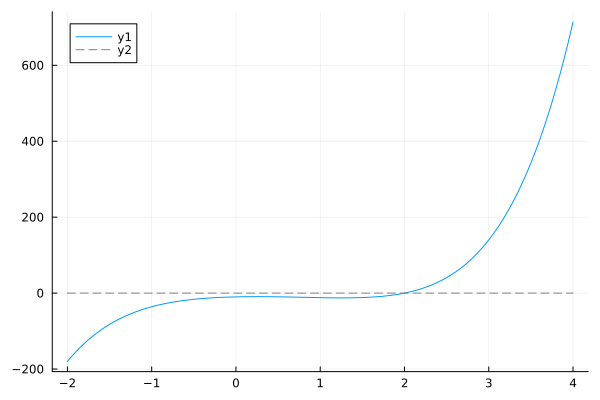

In [11]:
using Plots
f(x) = x^5 -2*x^4 +6*x^3 - 12*x^2 + 5*x - 10
plot(-2:0.001:4,f,grid=true)
plot!(x->0,c=:grey,style=:dash)

In [47]:
"""
Toma un vector de coeficientes del polinomio ordenados [an an-1 ... a1 a0]

"""
function intCotasCauchy(v::Matrix)
    cjt = Array{Float64}(undef,length(v))
    n=length(v)
    an=v[n]
    for i in 1:length(v)-1
       cjt[i]= abs(v[i]/an)
    end
    return (-(maximum(cjt)+1),maximum(cjt)+1)
end
"""
Devuelve el polinomio de horner de un polinomio P expresado en un vector como
[a0 a1 a2 ... an]
"""
function horner(a,x)
    n = length(a)
    s= a[n]
    for i in n-1:-1:1
        s= a[i]+s*x
    end
    return(s)
end
"""
Devuelve el polinomio de horner de la derivada de un polinomio P expresado en un vector como
[a0 a1 a2 ... an]
"""

function derhorner(a,x)
    n=length(a)
    b=Array{Float64}(undef,n-1)
    for i in 1:n-1
        b[i]=a[i+1]*i
    end
    return(horner(b,x))
end
        
    



derhorner (generic function with 1 method)

In [51]:
pol= [-10 5 -12 6 -2 1]
a =intCotasCauchy(pol)[1]
b = intCotasCauchy(pol)[2]


p(x) = horner(pol,x)
dp(x)=derhorner(pol,x)




display(biseccion(p,a,b,10^-10,10^-10,1000)[1])

display(newton(p,dp,a+5,10^-10,10^-10,1000)[1])


El algoritmo convergió


2.0000000000004547

El algoritmo convergió


2.0

## Ejercicios Complementarios

### Problema C.1

Cree una función para calcular una aproximación a la raíz cúbica $x=R^{1/3}$ de un número $R$ positivo. La función debe tomar como entrada el número $R$, la aproximación inicial $x_0$, el error máximo permitido $\epsilon$, y debe utilizar el algoritmo de de Newton-Raphson para calcular la raíz. Ponga a prueba la función con $R=40$, $x_0=20$ y $\epsilon=10^{-5}$

In [56]:
function raizcubica(R,x0,ϵ)
    f(x)= (x^3) - R
    df(x)=3*(x^2)

    return(newton(f,df,x0,ϵ,ϵ,1000)[1])
end

raizcubica(3,2,10^-10)

El algoritmo convergió

1.4422495703074083